In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

# 3차원 구조 데이터를 이용한 데이터 프레임 불러오기

In [2]:
df = pd.read_pickle('./data/df.pkl')
df

,uid,SMILES,S1_energy(eV),T1_energy(eV),abonds,atoms,bonds,dbonds,HBA1,HBA2,...,MP,MR,MW,nF,rotors,sbonds,tbonds,TPSA,y,mol
0,train_0,CCC1CCCCN1C(=O)C(C)OC(=O)c1c(C)oc(-n2cccc2)c1C#N,4.6747,3.3809,10.0,53.0,55.0,2.0,30.0,7.0,...,148.1122,107.1555,383.44090,0.0,7.0,42.0,1.0,88.47,1.2938,<rdkit.Chem.rdchem.Mol object at 0x0000022E1DD...
1,train_1,COc1ccc(Oc2ccc(N3C(=S)NC(c4ccccn4)C3c3cc(C)n(-...,3.6617,3.4585,29.0,71.0,76.0,1.0,36.0,8.0,...,315.7129,176.8537,597.12636,0.0,7.0,46.0,0.0,103.87,0.2032,<rdkit.Chem.rdchem.Mol object at 0x0000022E1DD...
2,train_2,CC(=O)Nc1ccc(C(=O)[C@H](C)Sc2nnc(C3CCCCC3)o2)cc1,3.6420,3.1787,11.0,49.0,51.0,2.0,29.0,7.0,...,187.5404,101.7412,373.46922,0.0,7.0,38.0,0.0,110.39,0.4633,<rdkit.Chem.rdchem.Mol object at 0x0000022E1DD...
3,train_3,OC(CNC1CC1)CN1CCc2sccc2C1,4.8901,3.7847,5.0,37.0,39.0,0.0,23.0,4.0,...,100.1604,74.4465,252.37570,0.0,5.0,34.0,0.0,63.74,1.1054,<rdkit.Chem.rdchem.Mol object at 0x0000022E1DD...
4,train_4,CCNC(CCCC(F)(F)F)C1(OCC)CCOCC1,6.4967,6.2724,0.0,46.0,46.0,0.0,29.0,3.0,...,10.2322,72.4987,297.35695,3.0,9.0,46.0,0.0,30.49,0.2243,<rdkit.Chem.rdchem.Mol object at 0x0000022E1DD...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30336,dev_66,N#Cc1cc(-c2ccc(N3c4ccccc4Oc4ccccc43)cc2)c(-c2c...,2.1939,2.1846,0.0,38.0,37.0,2.0,25.0,1.0,...,9.9177,65.2288,196.32906,0.0,6.0,35.0,0.0,20.23,0.0093,<rdkit.Chem.rdchem.Mol object at 0x0000022E340...
30337,dev_67,CC1(C)c2ccccc2N(c2ccc(-c3nc4ccc(N5c6ccccc6C(C)...,2.3537,2.3371,6.0,46.0,46.0,4.0,26.0,7.0,...,92.9253,100.8055,384.87764,0.0,10.0,36.0,0.0,114.12,0.0166,<rdkit.Chem.rdchem.Mol object at 0x0000022E340...
30338,dev_68,Cc1cc(-n2c3ccc(C(C)(C)C)cc3c3cc(C(C)(C)C)ccc32...,2.1364,2.1260,5.0,34.0,35.0,0.0,22.0,4.0,...,95.7176,59.3055,209.28806,0.0,4.0,30.0,0.0,50.08,0.0104,<rdkit.Chem.rdchem.Mol object at 0x0000022E340...
30339,dev_69,Cc1cc(-n2c3ccccc3c3ccccc32)cc(C)c1B1c2ccccc2B(...,2.2650,2.2511,18.0,47.0,49.0,4.0,24.0,7.0,...,280.0629,114.6405,444.88808,0.0,7.0,27.0,0.0,112.16,0.0139,<rdkit.Chem.rdchem.Mol object at 0x0000022E340...


In [3]:
X_test = pd.read_pickle('./data/X_test.pkl')
X_test

,uid,SMILES,abonds,atoms,bonds,dbonds,HBA1,HBA2,HBD,logP,MP,MR,MW,nF,rotors,sbonds,tbonds,TPSA
0,test_0,COc1ccc(S(=O)(=O)NC2CCN(C3CCCCC3)CC2)c(C)c1C,6.0,58.0,60.0,2.0,37.0,5.0,1.0,4.79700,120.9150,109.4147,380.544680,0.0,5.0,52.0,0.0,67.02
1,test_1,CC(CCCC1CCC2C3=C(CC[C@]12C)[C@@]1(C)CC[C@H](C)...,0.0,83.0,86.0,1.0,53.0,1.0,1.0,8.55900,150.1419,137.8138,428.733280,0.0,5.0,85.0,0.0,20.23
2,test_2,C[C@@H]1C[C@@H]1c1ccc2c(c1)c(-c1ccc[nH]c1=O)c(...,22.0,59.0,63.0,4.0,28.0,6.0,2.0,5.60760,328.3890,132.8929,511.540326,2.0,7.0,37.0,0.0,109.41
3,test_3,CCCn1c(=O)c2ccccc2n2c(SCC(=O)NC(Cc3ccccc3)c3cc...,27.0,63.0,67.0,2.0,33.0,8.0,1.0,5.03740,275.6852,143.7467,497.611280,0.0,10.0,38.0,0.0,106.59
4,test_4,CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)OCc1cn...,21.0,70.0,73.0,3.0,41.0,12.0,3.0,5.93320,287.7806,153.5609,589.749840,0.0,14.0,49.0,0.0,212.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,test_597,N#Cc1c(-n2c3ccccc3c3ccccc32)c(-n2c3ccccc3c3ccc...,66.0,92.0,104.0,0.0,34.0,6.0,0.0,13.34168,560.9173,246.3080,764.872080,0.0,4.0,37.0,1.0,56.40
598,test_598,CC1(C)c2ccccc2N(c2ccc(-c3cc(-c4ccc(N5c6ccccc6C...,42.0,88.0,96.0,0.0,42.0,2.0,0.0,12.15880,318.1822,213.1560,646.820720,0.0,4.0,54.0,0.0,32.26
599,test_599,Cc1nc(-c2ccc(N3c4ccccc4C(C)(C)c4ccccc43)cc2)cc...,42.0,91.0,99.0,0.0,44.0,2.0,0.0,12.46720,323.0215,218.1220,660.847300,0.0,4.0,57.0,0.0,32.26
600,test_600,c1ccc2c(c1)Oc1ccccc1N2c1ccc(-c2nc3ccccc3s2)cc1,28.0,45.0,50.0,0.0,19.0,3.0,0.0,7.60380,202.4009,122.7480,392.472340,0.0,2.0,22.0,0.0,53.60


In [4]:
train_x = df.iloc[:,4:-2]
train_y = df.iloc[:,-2]

X_train, X_val, y_train, y_val = train_test_split(train_x,train_y, test_size=0.1)

In [5]:
X_test = X_test.iloc[:, 2:]

# Random Forest Model

In [47]:
### 랜덤 포레스트로 기준 모형 생성

pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(n_jobs=-1, criterion='mse',
                           oob_score = True, random_state=42)
)

pipe.fit(X_train, y_train)

C:\Users\Tiger\anaconda3\envs\project_5\lib\site-packages\sklearn\ensemble\_forest.py:391: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(criterion='mse', n_jobs=-1,
                                       oob_score=True, random_state=42))])

In [48]:
y_pred = pipe.predict(X_val)

print('MSE :', mean_squared_error(y_val, y_pred))

MSE : 0.10024274699664187


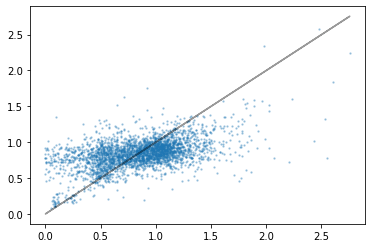

In [49]:
# plt.figure(figsize=(7,7))
plt.scatter(y_val, y_pred, alpha=0.3, s=2)
plt.plot(y_val, y_val, alpha=0.4, color='black')

In [9]:
y_sub = pipe.predict(X_test)

In [10]:
sub = pd.read_csv(f'./data/sample_submission.csv')
sub['ST1_GAP(eV)'] = y_sub

In [11]:
sub.to_csv('sub_RF.csv', index=False)

# public점수 : 0.273697915 // private점수 : 0.2490027699

# [ XG Boost Model ]

In [12]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

In [50]:
sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_val = sc.transform(X_val)
sc_X_test = sc.transform(X_test)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
Mean cross-validation score: 0.25
K-fold CV average score: 0.26
MSE: 0.10
RMSE: 0.32


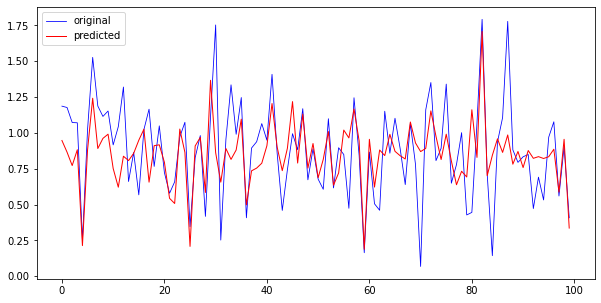

In [51]:
xgbr = xgb.XGBRegressor()
print(xgbr)
xgbr.fit(sc_X_train, y_train)

# - cross validataion
scores = cross_val_score(xgbr, sc_X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, sc_X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

pred = xgbr.predict(sc_X_val)

mse = mean_squared_error(y_val, pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

plt.figure(figsize=(10,5))
x_ax = range(100)
plt.plot(x_ax, y_val.values[:100], lw=0.8, color="blue", label="original")
plt.plot(x_ax, pred[:100], lw=1, color="red", label="predicted")
plt.legend()
plt.show()


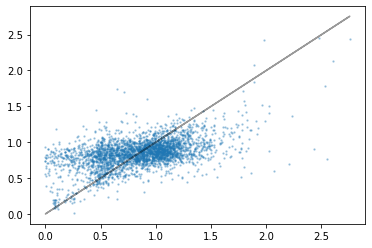

In [52]:
# plt.figure(figsize=(7,7))
plt.scatter(y_val, pred, alpha=0.3, s=2)
plt.plot(y_val, y_val, alpha=0.4, color='black')

In [ ]:
y_sub = xgbr.predict(X_test)

In [ ]:
sub = pd.read_csv(f'./data/sample_submission.csv')
sub['ST1_GAP(eV)'] = y_sub

In [32]:
sub.to_csv('sub_XG.csv', index=False)

# public점수 : 0.2783722875 / private점수 : 0.2498462547	